In [11]:
import pandas as pd 
import numpy as np

In [12]:
data = pd.read_csv('measurements.csv')
print(data.dtypes)
data.head()

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [13]:
def clean_df(df):
    n_cols = []
    for i in range(len(df.columns)):
        n_cols.append(df.columns[i].lower().replace(' ','_'))
    df.columns = n_cols
    
    lst = ['distance','consume','temp_inside']
    for col in lst:
        df[col] = df[col].str.replace(',','.').astype(float)
    return df

In [14]:
clean_df(data)
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [15]:
data.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters     object
refill_gas        object
dtype: object

In [19]:
data2 = pd.read_excel('measurements2.xlsx')
data2.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

In [20]:
data.merge(data2, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas,AC,refill liters,refill gas


# EDA

In [21]:
data.isna().sum()/len(data)*100

distance          0.000000
consume           0.000000
speed             0.000000
temp_inside       3.092784
temp_outside      0.000000
specials         76.030928
gas_type          0.000000
ac                0.000000
rain              0.000000
sun               0.000000
refill_liters    96.649485
refill_gas       96.649485
dtype: float64

Over 95% missing data in the las 2 columns drop. 

In [23]:
cols_to_drop = ['refill_liters', 'refill_gas']

In [24]:
data['specials'].value_counts(dropna=False)

specials
NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: count, dtype: int64

In [26]:
cols_to_drop.append('specials')
cols_to_drop

['refill_liters', 'refill_gas', 'specials', 'specials']

In [27]:
data = data.drop(cols_to_drop, axis=1)
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


# I fill temp_inside with mode 

In [28]:
mode = data['temp_inside'].mode()
mode

0    21.5
Name: temp_inside, dtype: float64

In [29]:
data.temp_inside.fillna(mode[0], inplace=True)

In [30]:
data.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
ac              0
rain            0
sun             0
dtype: int64

# Creatin new features

In [55]:
data['temp_diff'] = data.temp_inside - data.temp_outside

In [56]:
data['fuel_used'] = data.distance * data.consume/100
data

,distance,consume,temp_inside,temp_outside,gas_type,ac,rain,sun,fuel_used,cost_of_trip,trip_in_hours,avg_speed,temp_diff
0,28.0,5.0,21.5,12,E10,0,0,0,1.4000,2.863,0.433333,64.615385,9.5
1,12.0,4.2,21.5,13,E10,0,0,0,0.5040,1.031,0.500000,24.000000,8.5
2,11.2,5.5,21.5,15,E10,0,0,0,0.6160,1.260,0.633333,17.684211,6.5
3,12.9,3.9,21.5,14,E10,0,0,0,0.5031,1.029,0.600000,21.500000,7.5
4,18.5,4.5,21.5,15,E10,0,0,0,0.8325,1.702,0.766667,24.130435,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,24.5,18,SP98,0,0,0,0.5920,1.274,0.650000,24.615385,6.5
384,16.1,4.3,25.0,31,SP98,1,0,0,0.6923,1.490,0.633333,25.421053,-6.0
385,16.0,3.8,25.0,19,SP98,0,0,0,0.6080,1.308,0.750000,21.333333,6.0
386,15.4,4.6,25.0,31,SP98,1,0,0,0.7084,1.524,0.700000,22.000000,-6.0


# Current price of each type of gas in the Netherlands 

E10 = 2.045

SP98 = 2.152

In [32]:
data['cost_of_trip'] = np.where(data.gas_type == 'E10',data.fuel_used*2.045,data.fuel_used*2.152).round(3)

In [33]:
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,fuel_used,cost_of_trip
0,28.0,5.0,26,21.5,12,E10,0,0,0,1.4000,2.863
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.5040,1.031
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.6160,1.260
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.5031,1.029
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.8325,1.702
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,0.5920,1.274
384,16.1,4.3,38,25.0,31,SP98,1,0,0,0.6923,1.490
385,16.0,3.8,45,25.0,19,SP98,0,0,0,0.6080,1.308
386,15.4,4.6,42,25.0,31,SP98,1,0,0,0.7084,1.524


# Converting speed to decimal of an hour

In [34]:
data['trip_in_hours'] = data.speed/60

In [35]:
data['avg_speed'] = data['distance']/data['trip_in_hours']

In [37]:
data = data.drop(['speed'], axis = 1)

In [41]:
data.dtypes
data_num = data.select_dtypes(np.number)
data_cat = data.select_dtypes(object)

In [42]:
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.300000,11.800000,14.6000,19.000000,216.1000
consume,388.0,4.912371,1.033172,3.300000,4.300000,4.7000,5.300000,12.2000
temp_inside,388.0,21.916237,0.997449,19.000000,21.500000,22.0000,22.500000,25.5000
temp_outside,388.0,11.358247,6.991542,-5.000000,7.000000,10.0000,16.000000,31.0000
ac,388.0,0.077320,0.267443,0.000000,0.000000,0.0000,0.000000,1.0000
rain,388.0,0.123711,0.329677,0.000000,0.000000,0.0000,0.000000,1.0000
sun,388.0,0.082474,0.275441,0.000000,0.000000,0.0000,0.000000,1.0000
fuel_used,388.0,0.935294,1.115967,0.120000,0.551650,0.6806,0.916500,11.4533
cost_of_trip,388.0,1.968222,2.363725,0.245000,1.155000,1.4225,1.923000,24.6480
trip_in_hours,388.0,0.698797,0.226642,0.233333,0.545833,0.6750,0.833333,1.5000


In [83]:
data.to_csv('Cobify_clean_data.csv', index=False)

# All cleaning and feature adding completed

Looking at some visualizations

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

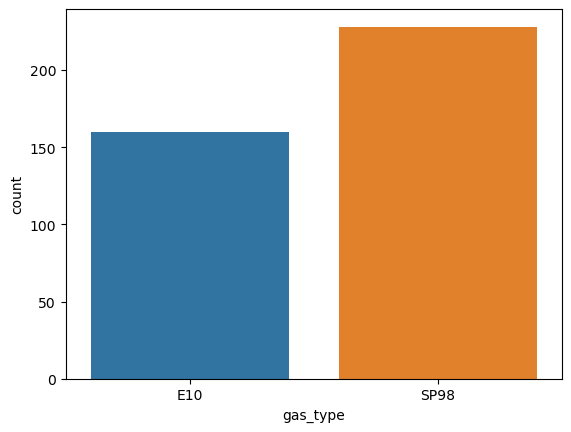

In [45]:
fig,ax = plt.subplots()
sns.countplot(x=data.gas_type)
plt.show()

# The above graph clearly shows that more of the trips have used SP98 fuel type historically 

/Users/alejandrollera/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


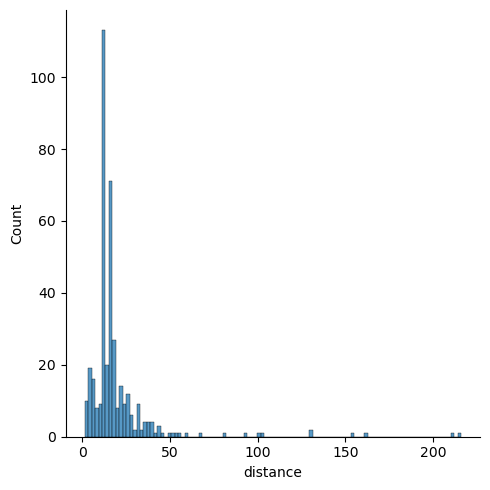

/Users/alejandrollera/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


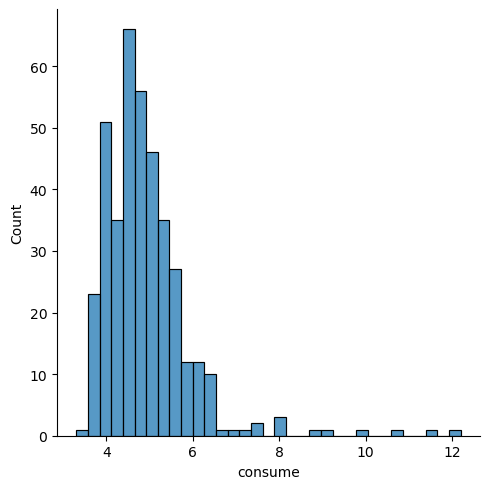

/Users/alejandrollera/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


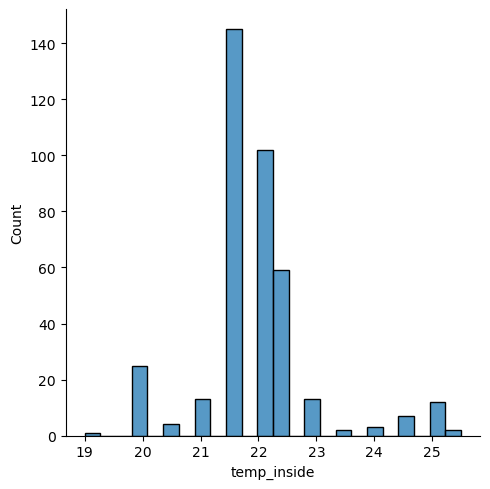

/Users/alejandrollera/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


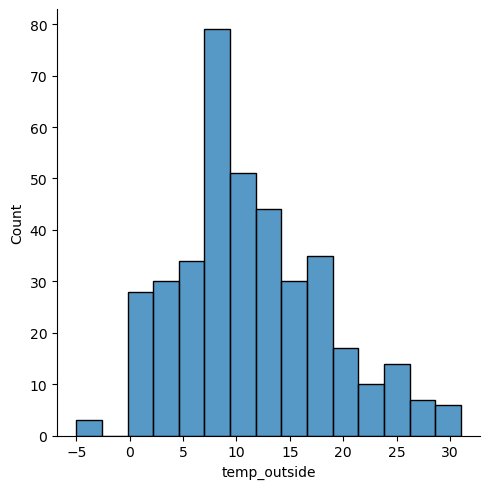

/Users/alejandrollera/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


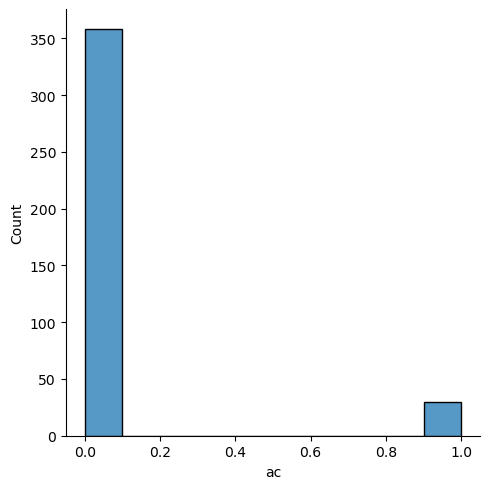

/Users/alejandrollera/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


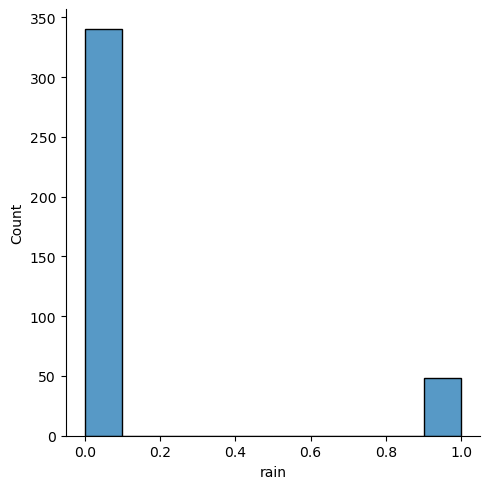

/Users/alejandrollera/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


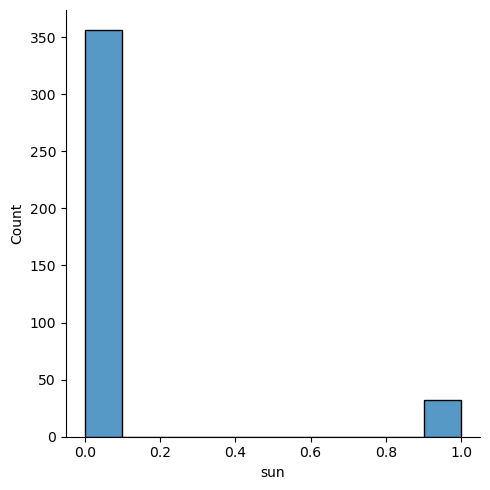

/Users/alejandrollera/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


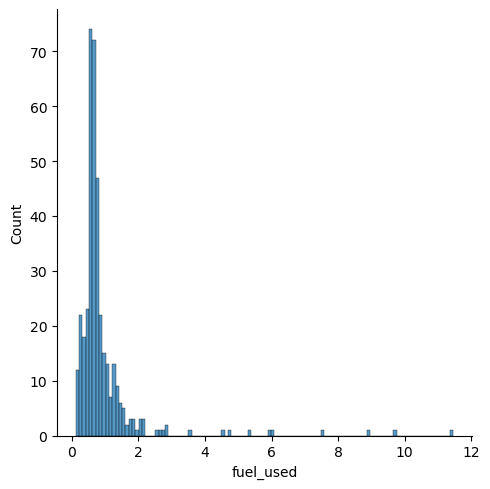

/Users/alejandrollera/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


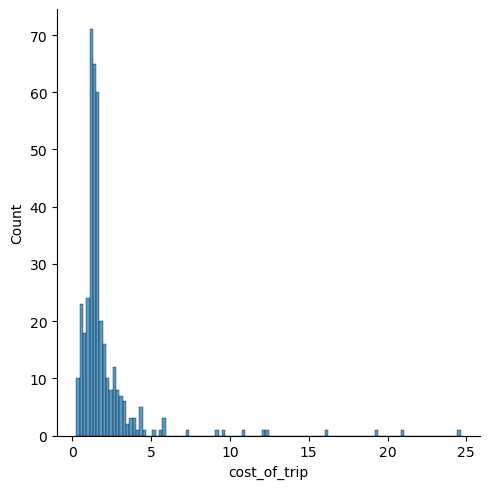

/Users/alejandrollera/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


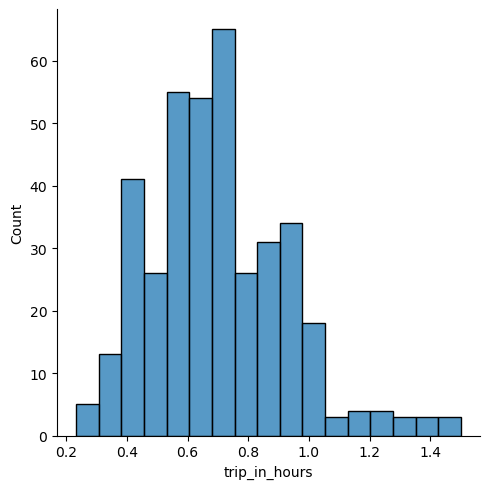

/Users/alejandrollera/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


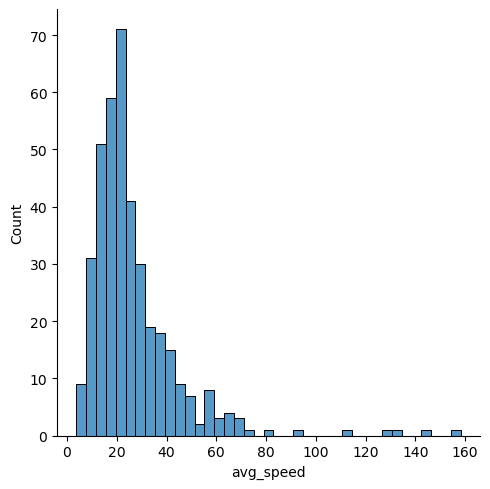

In [46]:
for column in data_num:
    sns.displot(data_num[column])
    plt.show()

# The above graph detail the distributions of the different numerical columns

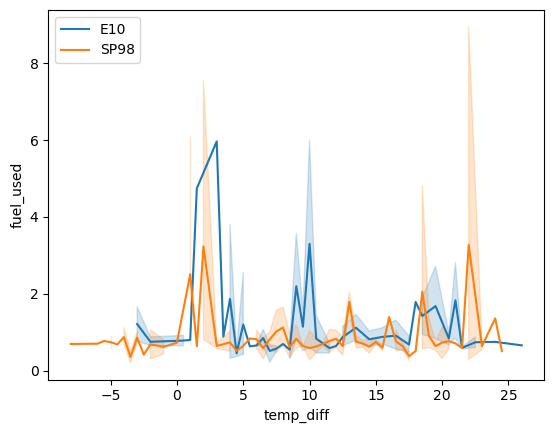

In [57]:
fig,ax = plt.subplots()
cole10 = data[data.gas_type=='E10']
col98 = data[data.gas_type=='SP98']

ax1 = sns.lineplot(data=cole10, x=cole10["temp_diff"], y=cole10["fuel_used"], label = 'E10')
ax2 = sns.lineplot(data=col98, x=col98["temp_diff"], y=col98["fuel_used"], label = 'SP98')
plt.legend(loc="upper left")
plt.show()

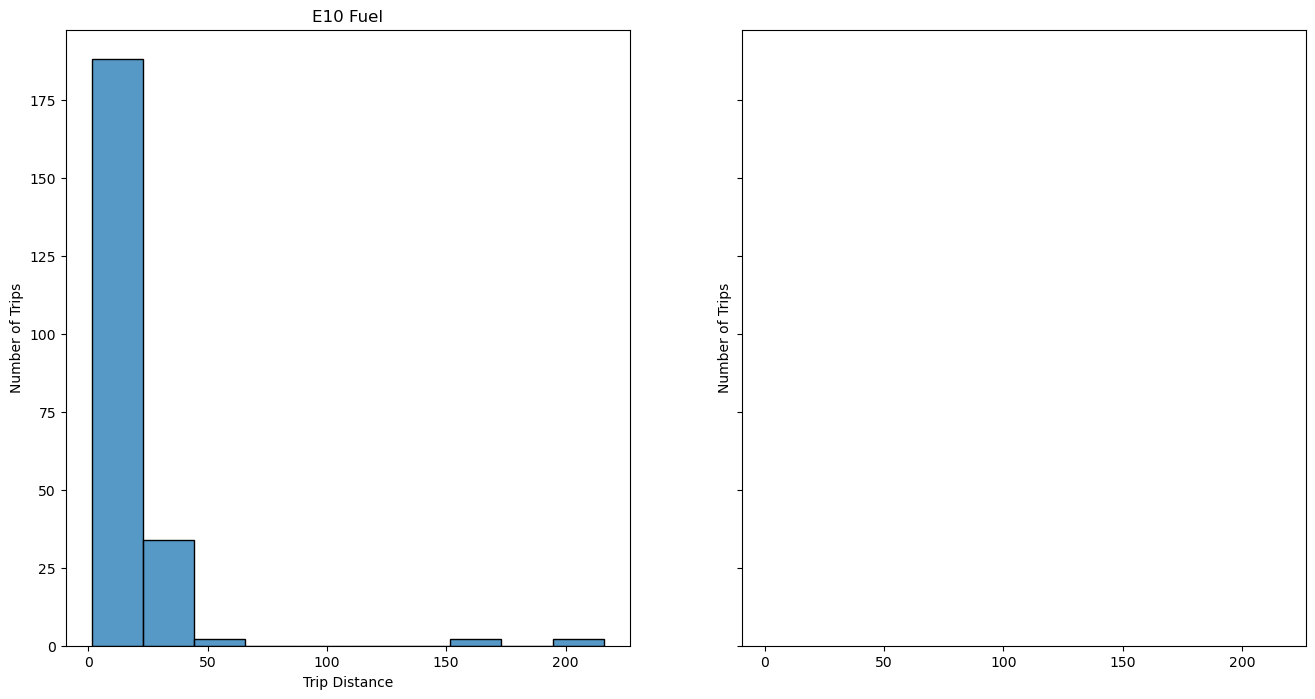

In [58]:
fig,axes = plt.subplots(1,2,figsize=(16,8), sharey=True, sharex=True)
cole10 = data[data.gas_type=='E10']
col98 = data[data.gas_type=='SP98']

sns.histplot(ax=axes[0],data=cole10, x=col98["distance"],bins=10,label = 'E10').set(title='E10 Fuel')
axes[0].set(xlabel="Trip Distance",ylabel="Number of Trips")
plt.ylabel("Number of Trips")

plt.show()

# The above graph show the number of trips at which distance they travel. Note that SP98 fuel is used for the longer distances 

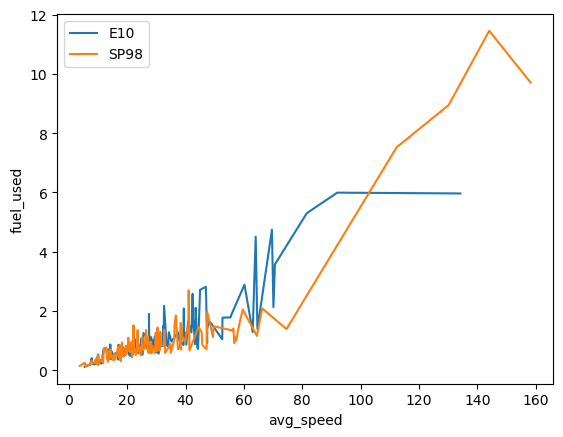

In [59]:
fig,axes = plt.subplots()
cole10 = data[data.gas_type=='E10']
col98 = data[data.gas_type=='SP98']

ax1 = sns.lineplot(data=cole10, x=cole10["avg_speed"], y=cole10["fuel_used"], label = 'E10')
ax2 = sns.lineplot(data=col98, x=col98["avg_speed"], y=col98["fuel_used"], label = 'SP98')
plt.legend(loc="upper left")
plt.show()

# The above graph shows the amount of fuel used based on average speed of trip. The higher the average speed, the more fuel is used by SP98

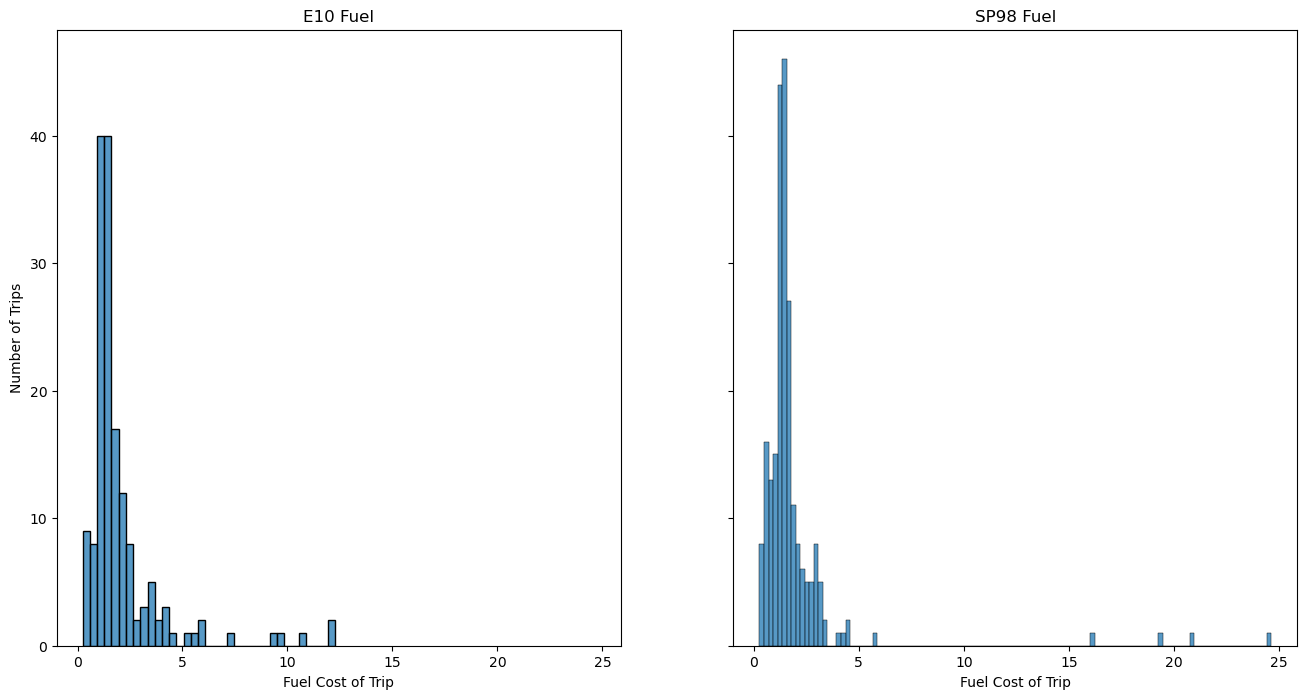

In [62]:
fig,axes = plt.subplots(1,2,figsize=(16,8), sharey=True, sharex=True)
cole10 = data[data.gas_type=='E10']
col98 = data[data.gas_type=='SP98']

sns.histplot(ax=axes[0],data=cole10, x=cole10["cost_of_trip"],label = 'E10').set(title='E10 Fuel')
axes[0].set(xlabel="Fuel Cost of Trip",ylabel="Number of Trips")

sns.histplot(ax=axes[1],data=col98, x=col98["cost_of_trip"],label = 'SP98').set(title='SP98 Fuel')
axes[1].set(xlabel="Fuel Cost of Trip",ylabel="Number of Trips")
plt.ylabel("Number of Trips")

plt.show()

In [63]:
display(data['cost_of_trip'].max())
display(data["cost_of_trip"].min())

24.648

0.245

# The above graph shows the distribution of the cost of fuel per trip for each fuel type. You can see that both graph have the same distribution. The SP98 fuel has the 4 highest trip costs. But they also have been used for the longests trip. It would be good to test the E10 fuel on a long trip with higher avg speeds to be able to compare them properly.

# Conclusion and insights 

# When looking at types of fuels used for various trips, there are some suggestions I would make based on the data.

-- Traveling at higher speeds, most likely on highways during longer trips, the E10 fuel is more economically sound. 

-- There is not much difference between the fuel economy of either gas when used for short distance or quick trips

--

In [69]:
import pandas as pd
from scipy.stats import ttest_ind

In [84]:
data = pd.read_csv('Cobify_clean_data.csv')
data.head()

,distance,consume,temp_inside,temp_outside,gas_type,ac,rain,sun,fuel_used,cost_of_trip,trip_in_hours,avg_speed
0,28.0,5.0,21.5,12,E10,0,0,0,1.4000,2.863,0.433333,64.615385
1,12.0,4.2,21.5,13,E10,0,0,0,0.5040,1.031,0.500000,24.000000
2,11.2,5.5,21.5,15,E10,0,0,0,0.6160,1.260,0.633333,17.684211
3,12.9,3.9,21.5,14,E10,0,0,0,0.5031,1.029,0.600000,21.500000
4,18.5,4.5,21.5,15,E10,0,0,0,0.8325,1.702,0.766667,24.130435


# The null hypothesis is that the consumption of the different fuels are the same

# Ttest- to verify if we accept or reject the hypothesis

In [73]:
stat, pval = ttest_ind(data[data.gas_type == 'E10'].fuel_used,data[data.gas_type == 'SP98'].fuel_used)
print('The p-value of the test is:',pval)
print('The stat value of the test is:',stat)

The p-value of the test is: 0.27679289437741406
The stat value of the test is: 1.089091767035112


The p-value is over the threshold of 0.05, we accept the hypothesis that the two fuel types are consumed almost equally

# The second hypothesis is that the fuel types cost about the same for per trip

In [74]:
stat, pval = ttest_ind(data[data.gas_type == 'E10'].cost_of_trip,data[data.gas_type == 'SP98'].cost_of_trip)
print('The p-value of the test is:',pval)
print('The stat value of the test is:',stat)

The p-value of the test is: 0.5077884541382895
The stat value of the test is: 0.6629028015838113


 The p-value is over the threshold of 0.05, we accept the hypothesis that the two fuel types currently cost about the same per trip usage 

In [95]:
import pandas as pd 
import numpy as np
from scipy import stats 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [96]:
data = pd.read_csv('Cobify_clean_data.csv')
data.head()

,distance,consume,temp_inside,temp_outside,gas_type,ac,rain,sun,fuel_used,cost_of_trip,trip_in_hours,avg_speed
0,28.0,5.0,21.5,12,E10,0,0,0,1.4000,2.863,0.433333,64.615385
1,12.0,4.2,21.5,13,E10,0,0,0,0.5040,1.031,0.500000,24.000000
2,11.2,5.5,21.5,15,E10,0,0,0,0.6160,1.260,0.633333,17.684211
3,12.9,3.9,21.5,14,E10,0,0,0,0.5031,1.029,0.600000,21.500000
4,18.5,4.5,21.5,15,E10,0,0,0,0.8325,1.702,0.766667,24.130435


In [104]:
columns_to_include = data.columns[data.columns != 'gas_type']  # Exclude the 'gas type' column
correlations = data[columns_to_include].corr()
correlations

,distance,consume,temp_inside,temp_outside,ac,rain,sun,fuel_used,cost_of_trip,trip_in_hours,avg_speed
distance,1.000000,-0.128967,0.077636,0.088175,-0.025738,-0.019791,0.081120,0.992101,0.990944,0.562299,0.884942
consume,-0.128967,1.000000,-0.154953,-0.320811,0.096591,0.248118,-0.170667,-0.052188,-0.051965,-0.227866,-0.177825
temp_inside,0.077636,-0.154953,1.000000,0.357431,0.300407,-0.035199,0.241530,0.065359,0.064781,0.060039,0.069588
temp_outside,0.088175,-0.320811,0.357431,1.000000,0.167562,-0.186315,0.346903,0.037877,0.040100,0.015411,0.107179
ac,-0.025738,0.096591,0.300407,0.167562,1.000000,0.242915,0.088598,-0.018700,-0.017403,-0.035408,-0.009260
rain,-0.019791,0.248118,-0.035199,-0.186315,0.242915,1.000000,-0.112650,0.009125,0.011388,0.009489,-0.027300
sun,0.081120,-0.170667,0.241530,0.346903,0.088598,-0.112650,1.000000,0.064247,0.065632,0.081618,0.058150
fuel_used,0.992101,-0.052188,0.065359,0.037877,-0.018700,0.009125,0.064247,1.000000,0.999497,0.551847,0.868658
cost_of_trip,0.990944,-0.051965,0.064781,0.040100,-0.017403,0.011388,0.065632,0.999497,1.000000,0.546884,0.867029
trip_in_hours,0.562299,-0.227866,0.060039,0.015411,-0.035408,0.009489,0.081618,0.551847,0.546884,1.000000,0.245061


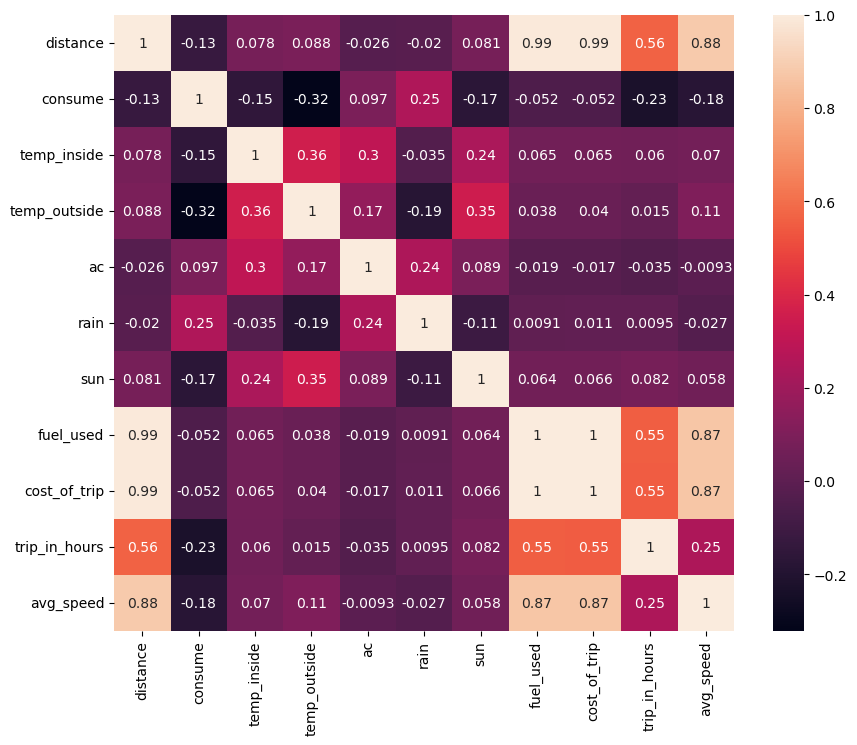

In [105]:
fig, ax=plt.subplots(figsize=(10,8))
ax=sns.heatmap(correlations, annot=True)

# Columns Created

In [107]:
cols_to_drop = ['cost_of_trip','fuel_used','avg_speed']
data=data.drop(cols_to_drop,axis=1)
data

,distance,consume,temp_inside,temp_outside,gas_type,ac,rain,sun,trip_in_hours
0,28.0,5.0,21.5,12,E10,0,0,0,0.433333
1,12.0,4.2,21.5,13,E10,0,0,0,0.500000
2,11.2,5.5,21.5,15,E10,0,0,0,0.633333
3,12.9,3.9,21.5,14,E10,0,0,0,0.600000
4,18.5,4.5,21.5,15,E10,0,0,0,0.766667
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,24.5,18,SP98,0,0,0,0.650000
384,16.1,4.3,25.0,31,SP98,1,0,0,0.633333
385,16.0,3.8,25.0,19,SP98,0,0,0,0.750000
386,15.4,4.6,25.0,31,SP98,1,0,0,0.700000


# Splitting X features and y-target. We are trying to predict the amount of fuel consumed

In [109]:
X = data.drop('consume',axis=1)
y = data['consume']
X

,distance,temp_inside,temp_outside,gas_type,ac,rain,sun,trip_in_hours
0,28.0,21.5,12,E10,0,0,0,0.433333
1,12.0,21.5,13,E10,0,0,0,0.500000
2,11.2,21.5,15,E10,0,0,0,0.633333
3,12.9,21.5,14,E10,0,0,0,0.600000
4,18.5,21.5,15,E10,0,0,0,0.766667
...,...,...,...,...,...,...,...,...
383,16.0,24.5,18,SP98,0,0,0,0.650000
384,16.1,25.0,31,SP98,1,0,0,0.633333
385,16.0,25.0,19,SP98,0,0,0,0.750000
386,15.4,25.0,31,SP98,1,0,0,0.700000


In [111]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print('X_train shape is:',X_train.shape)
print('y_train shape is:',y_train.shape)
print('X_test shape is:',X_test.shape)
print('y_traint shape is:',y_train.shape)


NameError: name 'train_test_split' is not defined